Chen Zihao 915490404

# STA 208: Homework 2 (Do not distribute)

## Due 5/2/2018 in class and online by 10am

__Instructions:__ To make grading easier for the TAs please print out your homework and also submit it on canvas.  The canvas should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand when you hand it in.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (30 pts)

Consider Poisson model with rate parameter $\lambda$ which has PMF,
$$
p(y|\lambda) = \frac{\lambda^y}{y!} e^{-\lambda},
$$
where $y = 0,1,\ldots$ is some count variable.
In Poison regression, we model $\lambda = e^{\beta^\top x}$ to obtain $p(y | x,\beta)$.

1. Let the loss function for Poisson regression be $\ell_i(\beta) \propto - \log p(y_i | x_i, \beta)$ for a dataset consisting of predictor variables and count values $\{x_i,y_i\}_{i=1}^n$.  Here $\propto$ means that we disregard any additive terms that are not dependent on $\beta$.  Write an expression for $\ell_i$ and derive its gradient. 
2. Show that the empirical risk $R_n(\beta)$ is a convex function of $\beta$.
3. Consider the mapping $F_\eta(\beta) = \beta - \eta \nabla R_n(\beta)$ which is the iteration of gradient descent ($\eta>0$ is called the learning parameter).  Show that at the minimizer of $R_n$, $\hat \beta$, we have that $F(\hat \beta) = \hat \beta$.
4. I have a script to simulate from this model below.  Implement the gradient descent algorithm above and show that with enough data (n large enough) the estimated $\hat \beta$ approaches the true $\beta$ (you can look at the sum of square error between these two vectors).

### 1.1 Write an expression for $\ell_i$ and derive its gradient. 

$$
\begin{split}
\ell_i(\beta) \propto - \log p(y_i | x_i, \beta) &=-\log\frac{\lambda^{y_i}}{y_i!} e^{-\lambda}\\
&= -\log \frac{e^{\beta^\top x_iy_i}}{y_i!}e^{-e^{\beta^\top x_i}} \\
&= -\beta^\top x_iy_i +\log y_i!+e^{\beta^\top x_i}
\end{split}
$$

Hense, we get

$$
\begin{split}
\triangledown\ell_i(\beta) &= - \log p(y_i | x_i, \beta)\\
&=-y_ix_i +e^{\beta^\top x_i}x_i
\end{split}
$$

### 1.2  Show that the empirical risk $R_n(\beta)$ is a convex function of $\beta$.
$$
R_n(\beta)=\frac 1 n \sum_{i=1}^n \ell_i(\beta)
$$
from 1.1 we can easily get the first derivative
$$
\triangledown R_n(\beta) = \frac 1 n \sum_{i=1}^n( -y_ix_i +e^{\beta^\top x_i}x_i)
$$
and we can also obtain the second derivative
$$
\triangledown^2 R_n(\beta) = \frac 1 n \sum_{i=1}^n( e^{\beta^\top x_i}x_ix_i^\top )\ge 0
$$
So that the $R_n(\beta)$ is a convex function of $\beta$.

### 1.3. Consider the mapping $F_\eta(\beta) = \beta - \eta \nabla R_n(\beta)$  which is the iteration of gradient descent ($\eta>0$ is called the learning parameter).  Show that at the minimizer of $R_n$, $\hat \beta$, we have that $F(\hat \beta) = \hat \beta$.

When $\hat \beta$ is the minimizer of $R_n$, we can get $\nabla R_n(\hat \beta)=0$ so that 
$$F_\eta(\hat\beta) = \hat\beta - \eta \nabla R_n(\hat\beta)=\hat\beta$$

### 1.4. Implement the gradient descent algorithm above and show that with enough data (n large enough) the estimated $\hat \beta$ approaches the true $\beta$ (you can look at the sum of square error between these two vectors).

In [1]:
import numpy as np
import math

In [2]:
## Simulate from the Poisson regression model (use y,X)
n, p = 1000,20
X = np.random.normal(0,1,size = (n,p))
beta = np.random.normal(0,.2,size = (p))
lamb = np.exp(X @ beta)
y = np.random.poisson(lamb)

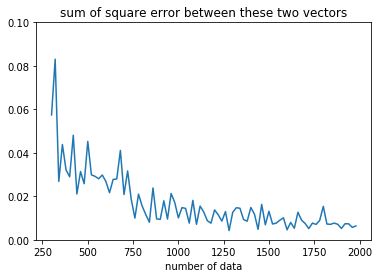

In [3]:
import matplotlib.pyplot as plt
nlist = np.arange(300,2000,20)

np.random.seed(208)

def f1(w):
    l = np.zeros(p)
    for i in range(n):
        l = l-y[i]*X[i,]+math.exp(X[i,]@w)*X[i,]
    return l/n

result = []
for n in nlist:
    p = 20
    X = np.random.normal(0,1,size = (n,p))
    beta = np.random.normal(0,.2,size = (p))
    lamb = np.exp(X @ beta)
    y = np.random.poisson(lamb)
    
    eta = 0.4
    w = np.zeros(p)
    g = f1(w)
    r0 = np.linalg.norm(g)
    
    for i in range(100):
        if np.linalg.norm(g)<0.01*r0:
            break
        g = f1(w)
        w = w - eta*g
    result.append(((beta - w)**2).sum()) 
    
plt.plot(nlist,result)
plt.title('sum of square error between these two vectors')
plt.xlabel('number of data')
plt.ylim(0,0.1)
plt.show()

According to the plot above, the curve shows that the sum of square error between these two vector tends to 0 when n, the sample size, increasing.

__Exercise 2__ (30 pts)

Recall the subset selection problem with tuning parameter $k$,
$$
\min_{\beta : {\rm supp}(\beta) \le k}\| y - X_S \beta_S \|_2^2.
$$

1. Write the subset selection problem in the following form
$$
\min_{S \subseteq \{1,\ldots,p\}, |S|\le k} y^\top P_S y,
$$
where $P_S$ is a projection.  Describe the subspace that is the range of this projection.
2. Suppose that we have a nested sequence of models $S_1\subset S_2 \subset \ldots \subset S_p$ such that $|S_k| = k$ (it contains $k$ variables).  Prove that $$y^\top P_{S_k} y \ge y^\top P_{S_{k+1}} y$$ for $k=1,\ldots,p-1$.  What does this tell us about the solution to the subset selection problem and the constraint $|S| \le k$?
3. Suppose that $X$ is orthogonal, then write a computationally efficient pseudocode to solve the subset selection problem.  Prove that it is correct (your algorithm actually solves subset selection under othogonal design).
4. Suppose that we have that $n = p$ and $y_i = \beta_i + \epsilon_i$ (identity design matrix) where $\epsilon_i$ satisfies 
$$
\mathbb P \left\{ |\epsilon_i| \ge t \right\} \le 2 e^{-t^2 / 2\sigma^2}
$$
for any $t > 0$ (this is true for central Normal RVs) for some $\sigma > 0$.
Suppose that there is some true $S_0 \subset\{1,\ldots,p\}$ such that $|S_0| = k < p$ and ${\rm supp}(\beta) = S_0$.
Prove the following.

__Proposition__
Define $\mu = \min_{j \in S_0} |\beta_j|$ and call $\mu / \sigma$ the signal-to-noise ratio.  Then if 
$$
\frac{\mu}{\sigma} > 2 \sqrt{2 \log \left( \frac{2n}{\delta}\right)},
$$
then the true $S$ is selected by subset selection with probability at least $1 - \delta$.

Hint: rewrite the subset selection problem with $X = I$ and compare the objective at $S_0$ to any other $S$.

### 2.1

$$
\begin{split}
\min_{\beta : {\rm supp}(\beta) \le k}\| y - X_S \beta_S \|_2^2 &=\min_{\beta : {\rm supp}(\beta) \le k} (y - X_S \beta_S)^\top(y - X_S \beta_S) \\ 
&=\min_{\beta : {\rm supp}(\beta) \le k} (y^\top y -\beta_S^\top X_S^\top y - y^\top X_S \beta_S +\beta_S^\top X_S^\top X_S \beta_S ) \\ 
&=\min_{\beta : {\rm supp}(\beta) \le k} (y^\top y -2\beta_S^\top X_S^\top y  +\beta_S^\top X_S^\top X_S \beta_S ) \\ 
\end{split}
$$

for each S we can get

$$
\hat\beta_S=(X_S^\top X_S)^{-1}X_S^\top y
$$

and we can get 

$$
X_S\hat\beta_S =  X_S(X_S^\top X_S)^{-1}X_S^\top y = H_Sy
$$

where $H_S = X_S(X_S^\top X_S)^{-1}X_S^\top$ and $H_S$ is a projection matrix.

plug in and we can get the subset selection problem


$$
\begin{split}
\min_{S \subseteq \{1,\ldots,p\}, |S|\le k}\min_{\beta}\| y - X_S \beta_S \|_2^2 &=\min_{S \subseteq \{1,\ldots,p\}, |S|\le k}\min_{\beta} (y^\top y -2\beta_S^\top X_S^\top y  +\beta_S^\top X_S^\top X_S \beta_S ) \\ 
&=\min_{S \subseteq \{1,\ldots,p\}, |S|\le k}(y^\top y -2y^\top H_S^\top y  +y^\top H_S^\top H_S y )\\
&=\min_{S \subseteq \{1,\ldots,p\}, |S|\le k}(y^\top y -2y^\top H_S y  +y^\top H_S y )\\
&=\min_{S \subseteq \{1,\ldots,p\}, |S|\le k}(y^\top y -y^\top H_S y)\\
&=\min_{S \subseteq \{1,\ldots,p\}, |S|\le k} y^\top(I- H_S)y\\
&=\min_{S \subseteq \{1,\ldots,p\}, |S|\le k} y^\top P_S y
\end{split}
$$

where $P_S = I- H_S$

$P_S$ is a projection martix because 

(1) $P_S^\top = (I- H_S)^\top =I^\top- H_S^\top= I- H_S = P_S$

(2) $P_S^\top P_S = (I^\top- H_S^\top)(I- H_S)= (I^\top I- I^\top H_S-H_S^\top I+H_S^\top H_S) = I-H_S-H_S+H_S=I-H_S=P_S$

The subspace is the orthogonal space of the collumn space of the X matrix.

### 2.2

$$
\begin{split}
y^\top P_{S_k} y &\ge y^\top P_{S_{k+1}} y\\
\min_{\beta_{k}}\| y - X_{S_k} \beta_{k} \|_2^2 &\ge \min_{\beta_{k+1}}\| y - X_{S_{k+1}} \beta_{k+1} \|_2^2
\end{split}
$$

let $\hat \beta_{k}$ and $\hat \beta_{k+1}$ is the solution then we can get 

$$
\| y - X_{S_k} \hat\beta_{k} \|_2^2 \ge \| y - X_{S_{k+1}} \hat \beta_{k+1} \|_2^2
$$

we need to prove the inequality above.

because $\hat \beta_{k+1}$ is the minimizer then we have

$$
\| y - X_{S_{k+1}} \hat \beta_{k+1} \|_2^2\le \| y - X_{S_{k+1}} \beta_{k+1} \|_2^2
$$

Without the lack of generality, assume that $X_{S_{k+1}}= [X_{S_{k}},x_{k+1}]$

let $\beta_{k+1}^{*\top} = [\beta_{k}^\top, 0]$ then we got 

$$
\| y - X_{S_{k+1}} \hat \beta_{k+1} \|_2^2\le \| y - X_{S_{k+1}} \beta_{k+1}^* \|_2^2=\| y - X_{S_{k}} \hat \beta_{k} \|_2^2
$$

If the solution is unique, the conclusion above implies that the solution to the subset selection problem will have the property $|S|=k$. 

If the solutions are not unique, which implies multicollinearity, at least one of the subset selection solutions will still have the property $|S|=k$

### 2.3

step 1. solve $\min_{\beta_i}||y - X_i\beta_i||_2^2$ and store $\beta_i's$ and the function values.

step 2. sort the function value and take the lowest k $\beta_i's$ corresponding to the k lowest function values.

step 3. these k lowest $\beta_i's$ is what we want

pseudocode

- for iter = 1, 2, ..., p
> - $\beta_i = (x_i^Tx_i)^{-1}x_iy$
> - $f_i = ||y-x_i\beta_i||_2^2$
- sort $f_i$ increasingly
- $S\leftarrow$ the index of the first k in the sorted $f_i$
- $\beta[i]=\beta_i$ if $i\in S$ and $\beta[j]=0$ if $j\not\in S$

proof:

- $X$ is orthogonal, $(1)\space SSR_{x_k+1}|SSR_{{S_k}}=SSR_{x_k+1}$

- For regression model we have $SSTO=SSE+SSR$, plug (1) in and we can get $SSTO = SSE +\sum_{i=1}^kSSR_{x_i}$

- $||y - X_i\beta_i||_2^2=SSE=SSTO-SSR=SSTO-\sum_{i=1}^kSSR_{x_i}$

- In the algorithm, I take the lowest $SSE_{x_i}$ which is the $SSE$ for the single variable regression which implies that i take k $X_i$ with the k largest $SSR_{x_i}$ so that the $SSE$ of the final model is minimized



### 2.4
$$
\begin{split}
\max_{j\not\in S}|\epsilon_j|&>\min_{j\in S}|\beta_j+\epsilon_j|\\&\ge\min_{j\in S}(|\beta_j|-|\epsilon_j|)\\&\ge\min_{j\in S}|\beta_j|-\max_{j\in S}|\epsilon_j|\\
\max_{j\not\in S}|\epsilon_j|+\max_{j\in S}|\epsilon_j|&>\min_{j\in S}|\beta_j|
\end{split}
$$
let A = {S is not selected by subset selection}
$$
\begin{split}
P(A) &= P(\max_{j\not\in S}|\epsilon_j|>\min_{j\in S}|\beta_j+\epsilon_j|)\\
&\le P(\max_{j\not\in S}|\epsilon_j|+\max_{j\in S}|\epsilon_j|>\min_{j\in S}|\beta_j|)\\
&\le P(2\max_j|\epsilon_j|>\min_{j\in S}|\beta_j|)\\
&\le P(\max_j|\epsilon_j|>\frac \mu 2)
\end{split}
$$

if $\frac{\mu}{\sigma} > 2 \sqrt{2 \log \left( \frac{2n}{\delta}\right)}$,then 

$$
P(\max_j|\epsilon_j|>\frac \mu 2) \le P(\max_j|\epsilon_j|>\sigma\sqrt{2 \log \left( \frac{2n}{\delta}\right)})\le nP(|\epsilon_j|>\sigma\sqrt{2 \log \left( \frac{2n}{\delta}\right)})
$$
plug $t = \sigma\sqrt{2 \log \left( \frac{2n}{\delta}\right)}$ into $\mathbb P \left\{ |\epsilon_i| \ge t \right\} \le 2 e^{-t^2 / 2\sigma^2}$,then we can get 
$$
P(|\epsilon_j|>\sigma\sqrt{2 \log \left( \frac{2n}{\delta}\right)})\le n \times \frac \delta n = \delta
$$

which means 

$$
\begin{split}
P(A)&\le\delta\\
1-P(A)&\ge 1-\delta
\end{split}
$$

the true $S$ is selected by subset selection with probability at least $1 - \delta$.

__Exercise 3__ (40 pts)
For this exercise, it may be helpful to use the `sklearn.linear_model` module.  I have also included a plotting tool for making the lasso path in ESL.

1. Load the training and test data using the script below.  Fit OLS on the full dataset and compute the test error.  Throughout you do not need to compute an intercept but you should normalize the X (divide by the column norms).
2. Train and tune ridge regression and compute the test error (square error loss).
3. Fit the lasso path to the data and compute the test error for each returned lasso coefficient.
4. Compare and contrast the lars path to the lasso path, what is the key difference.  Tell me when the active sets differ and how, if they do at all.
4. Extract each active set from the lasso path and recompute the restricted OLS for each.  Compute and compare the test error for each model.
5. If your boss said that they wanted a more parsimonious model (a smaller model) then which model would you choose, justify your answer.  Under which circumstance would you choose the model with the smallest test error.

### 3.1 Load the training and test data using the script below. Fit OLS on the full dataset and compute the test error. Throughout you do not need to compute an intercept but you should normalize the X (divide by the column norms).

In [4]:
import pickle
with open('hw2.data','rb') as f:
    y_tr,X_tr,y_te,X_te = pickle.load(f)

In [5]:
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn import linear_model
X_trn = normalize(X_tr,axis = 0)
X_ten = normalize(X_te,axis = 0)

In [6]:
lm = linear_model.LinearRegression(fit_intercept=False)
lm.fit(X_trn,y_tr)
y_hat = lm.predict(X_ten)
np.mean((y_hat - y_te)**2)

1.0411444900270803

### 3.2. Train and tune ridge regression and compute the test error (square error loss).

In [7]:
alphas = 10**np.linspace(10,-5,1000)
ridge = linear_model.Ridge()
loss = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_trn,y_tr)
    loss.append(np.mean((ridge.predict(X_ten) - y_te)**2))
alphas[loss.index(min(loss))]

0.0026146732118010976

In [8]:
min(loss)

1.0385123094346131

For the ridge regression above, we can see that with $\alpha=0.00261$, the square error loss has the lowest value 1.039

### 3.3. Fit the lasso path to the data and compute the test error for each returned lasso coefficient.

In [9]:
def plot_lars(coefs, lines=False, title="Lars Path"):
    """
    Plot the lasso path where coefs is a matrix - the columns are beta vectors
    """
    xx = np.sum(np.abs(coefs.T), axis=1)
    xx /= xx[-1]
    plt.plot(xx, coefs.T)
    ymin, ymax = plt.ylim()
    if lines:
        plt.vlines(xx, ymin, ymax, linestyle='dashed')
    plt.xlabel('|coef| / max|coef|')
    plt.ylabel('Coefficients')
    plt.title(title)
    plt.axis('tight')

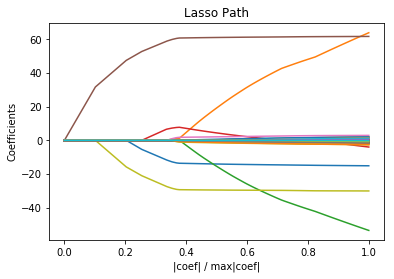

In [10]:
lasso = linear_model.lars_path(X_trn,y_tr,method="lasso")
plot_lars(lasso[2],title="Lasso Path")
plt.show()

In [11]:
n = lasso[2].shape[1]
error = []
for i in range(n):
    y_hat = X_ten@lasso[2][:,i]
    error.append(np.mean((y_hat - y_te)**2))
#error
min(error)

0.99739513588665663

the question ask "compute the test error for each returned lasso coefficient." It is a long list , I just report the minimum values here.

### 3.4. Compare and contrast the lars path to the lasso path, what is the key difference.  Tell me when the active sets differ and how, if they do at all.

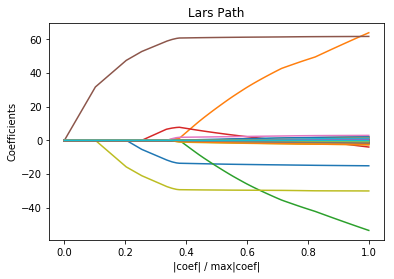

In [12]:
lars = linear_model.lars_path(X_trn,y_tr)
plot_lars(lasso[2])
plt.show()

The two paths look the same. It is because of the lasso modification, we can not figured out which variable hits zero from the grpah. (no leaving event in this question)

### 3.5. Extract each active set from the lasso path and recompute the restricted OLS for each.  Compute and compare the test error for each model.

In [13]:
X_trn[:,np.where(lasso[2][:,60] != 0)].shape

(1000, 1, 60)

In [14]:
LO_error = []
for i in range(1,X_trn.shape[1]):
    X_trin = X_trn[:,np.where(lasso[2][:,i] != 0)]
    X_tein = X_ten[:,np.where(lasso[2][:,i] != 0)]
    X_trin = X_trin.reshape(X_trn.shape[0],X_trin.shape[2])
    X_tein = X_tein.reshape(X_ten.shape[0],X_tein.shape[2])
    
    lm = linear_model.LinearRegression(fit_intercept=False)
    lm.fit(X_trin,y_tr)
    y_hat = lm.predict(X_tein)
    LO_error.append(np.mean((y_hat - y_te)**2))
#LO_error
min(LO_error)

0.98483883504521597

Same situation here. the list is too long so that i just report the minimum values.

### 3.6 If your boss said that they wanted a more parsimonious model (a smaller model) then which model would you choose, justify your answer.  Under which circumstance would you choose the model with the smallest test error.

In this situation, I need to put a penalty to the number of the parameters. I will use AIC here.

In [15]:
math.log(10)

2.302585092994046

In [16]:
LO_AIC = []
for i in range(1,X_trn.shape[1]):
    X_trin = X_trn[:,np.where(lasso[2][:,i] != 0)]
    X_tein = X_ten[:,np.where(lasso[2][:,i] != 0)]
    X_trin = X_trin.reshape(X_trn.shape[0],X_trin.shape[2])
    X_tein = X_tein.reshape(X_ten.shape[0],X_tein.shape[2])
    
    lm = linear_model.LinearRegression(fit_intercept=False)
    lm.fit(X_trin,y_tr)
    y_hat = lm.predict(X_tein)
    LO_AIC.append(2*i+X_trn.shape[0]*math.log(np.mean((y_hat - y_te)**2)))
#LO_error
min(LO_AIC)

25.245694025370554

In [17]:
i = LO_AIC.index(min(LO_AIC))
list(np.where(lasso[2][:,i] != 0)[0])

[0, 1, 2, 3, 5, 8, 27, 38, 50, 52, 53, 69, 76, 77, 78, 80, 91, 96, 97]

The list above is the variables which i will put it in the linear model which has the minimum AIC and I think this model will meet my boss's requirment.

Under the circumstances that the number of sample is much larger than the number of variables $(n>>p)$, I will choose the model with the smallest test error.